In [7]:
import json
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import pandas as pd
from prettytable import PrettyTable
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter


[nltk_data] Downloading package stopwords to
[nltk_data]     /homes/es1519/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def create_word_cloud(df, title, column_name="comment_text"):
    all_comments = ' '.join(df[column_name].values)
    all_comments = all_comments.translate(str.maketrans('', '', string.punctuation))
    words = all_comments.lower().split()
    words = [word for word in words if len(word) >= 3]
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    word_freq = Counter(words)
    print(word_freq.most_common(20))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate_from_frequencies(word_freq)
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

[('ukraine', 689126), ('russia', 371470), ('war', 209867), ('nato', 208360), ('invade', 150208), ('troops', 149159), ('russian', 143614), ('putin', 132241), ('border', 114634), ('stand', 79503), ('would', 76208), ('people', 56201), ('biden', 55249), ('dont', 51543), ('like', 50437), ('country', 45975), ('want', 42952), ('going', 41468), ('world', 40082), ('military', 39725)]


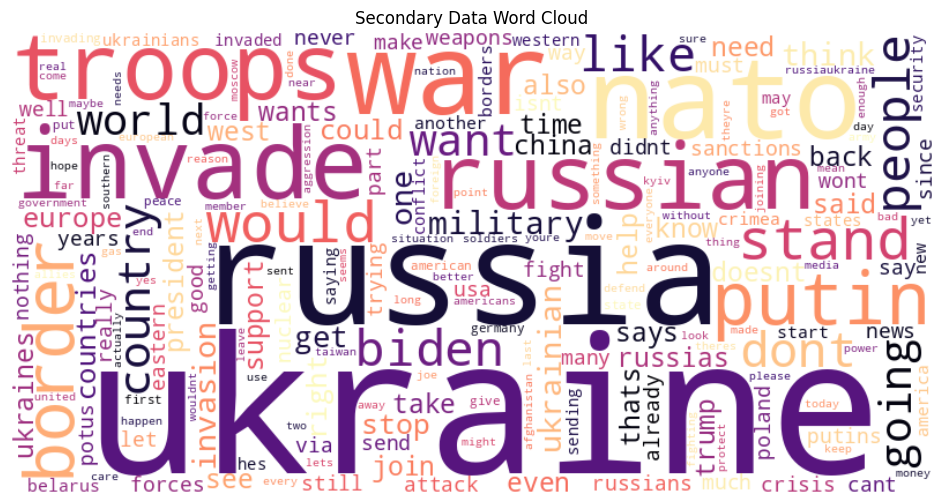

In [9]:
all_data = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/war_data/data/cleaned_data.csv')
create_word_cloud(all_data, "Secondary Data Word Cloud", column_name="cleanedTweet")


In [ ]:
csv_file = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/war_data/training_data/neutral.csv'
secondary_neutral = pd.read_csv(csv_file)
secondary_neutral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691898 entries, 0 to 691897
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               691898 non-null  object
 1   comment_text     691898 non-null  object
 2   toxicity         691898 non-null  int64 
 3   severe_toxicity  691898 non-null  int64 
 4   obscene          691898 non-null  int64 
 5   threat           691898 non-null  int64 
 6   insult           691898 non-null  int64 
 7   identity_attack  691898 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 42.2+ MB


In [ ]:
data = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/topic_6/all_data.csv')
all_comments = ' '.join(data['comment_text'].values)
print(len(all_comments))

558075


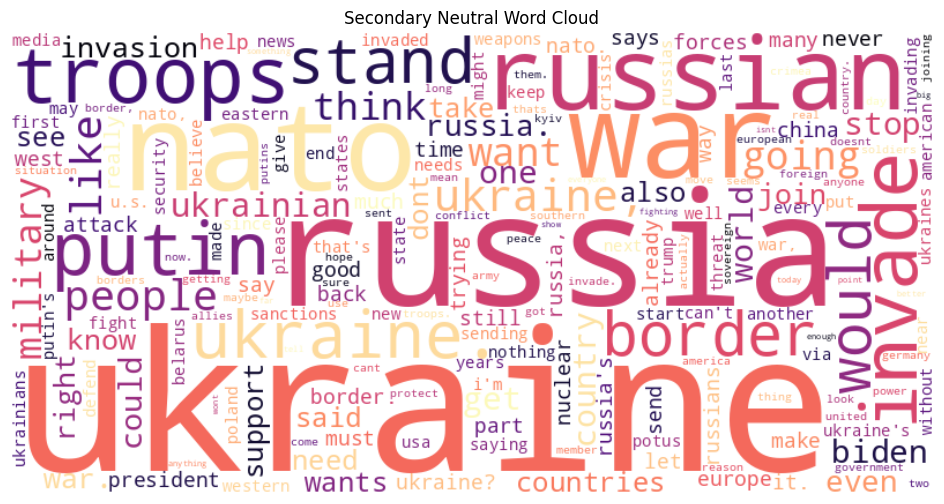

In [ ]:
create_word_cloud(secondary_neutral, "Secondary Neutral Word Cloud")

In [ ]:
csv_file = '/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/war_data/training_data/secondary.csv'
secondary_positive = pd.read_csv(csv_file)
secondary_positive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54043 entries, 0 to 54042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               54043 non-null  object
 1   comment_text     54043 non-null  object
 2   toxicity         54043 non-null  int64 
 3   severe_toxicity  54043 non-null  int64 
 4   obscene          54043 non-null  int64 
 5   threat           54043 non-null  int64 
 6   insult           54043 non-null  int64 
 7   identity_attack  54043 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 3.3+ MB


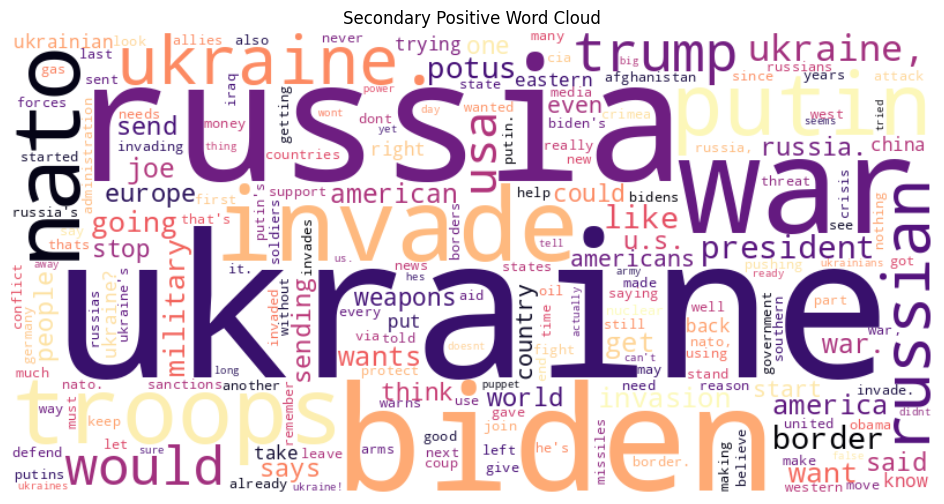

In [ ]:
create_word_cloud(secondary_positive, "Secondary Positive Word Cloud")

In [ ]:
keyword = 'USA'
count_neu = secondary_neutral['comment_text'].str.contains(keyword).sum()
count_pos = secondary_positive['comment_text'].str.contains(keyword).sum()

print(f"Secondary Neutral includes {count_neu} rows with mentions of POTUS")
print(f"Secondary Positive includes {count_pos} rows with mentions of POTUS")

Secondary Neutral includes 11061 rows with mentions of POTUS
Secondary Positive includes 4293 rows with mentions of POTUS


In [ ]:
train_jigsaw = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/train_jigsaw.csv')
val_jigsaw = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/val_jigsaw.csv')
test_jigsaw = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/test_jigsaw.csv')

jigsaw = pd.concat([
    train_jigsaw,
    val_jigsaw,
    test_jigsaw
], ignore_index=True)

print(f"Train: {len(train_jigsaw)} entries ({round(len(train_jigsaw) / len(jigsaw), 2) * 100}%)")
print(f"Validation: {len(val_jigsaw)} entries ({round(len(val_jigsaw) / len(jigsaw), 2) * 100}%)")
print(f"Test: {len(test_jigsaw)} entries ({round(len(test_jigsaw) / len(jigsaw), 2) * 100}%)")
print()
jigsaw.info()

Train: 178839 entries (80.0%)
Validation: 22355 entries (10.0%)
Test: 22355 entries (10.0%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               223549 non-null  object
 1   comment_text     223549 non-null  object
 2   toxicity         223549 non-null  int64 
 3   severe_toxicity  223549 non-null  int64 
 4   obscene          223549 non-null  int64 
 5   threat           223549 non-null  int64 
 6   insult           223549 non-null  int64 
 7   identity_attack  223549 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 13.6+ MB


In [ ]:
jigsaw["dataset"] = "jigsaw"
secondary_neutral["dataset"] = "secondary_neutral"
secondary_positive["dataset"] = "secondary_positive"
combined_df = pd.concat([
    jigsaw,
    secondary_neutral,
    secondary_positive
])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 969490 entries, 0 to 54042
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               969490 non-null  object
 1   comment_text     969490 non-null  object
 2   toxicity         969490 non-null  int64 
 3   severe_toxicity  969490 non-null  int64 
 4   obscene          969490 non-null  int64 
 5   threat           969490 non-null  int64 
 6   insult           969490 non-null  int64 
 7   identity_attack  969490 non-null  int64 
 8   dataset          969490 non-null  object
dtypes: int64(6), object(3)
memory usage: 74.0+ MB


In [ ]:
def table_positive_counts(original_data, data):
    dataset_counts = original_data['dataset'].value_counts()

    table = PrettyTable()
    table.field_names = ['Dataset', 'Toxicity', 'Severe Toxicity', 'Obscene', 'Threat', 'Insult', 'Identity Attack']

    for dataset, row in data.iterrows():
        t_row = [dataset]
        for column in data.columns:
            count = row[column]
            total_count = dataset_counts[dataset]
            percentage = count / total_count * 100
            t_row.append(f'{count} ({percentage:.2f}%)')
        table.add_row(t_row)

    print(table)

In [ ]:
def table_at_least_one(original_data, data):
    dataset_counts = original_data['dataset'].value_counts()

    table = PrettyTable()
    table.field_names = ['Dataset', 'Count', 'Percentage']

    for dataset, count in data.items():
        percentage = count / dataset_counts[dataset] * 100
        table.add_row([dataset, count, f'{percentage:.2f}%'])

    print(table)

In [ ]:
grouped_df = combined_df.groupby('dataset')[['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']].sum()
table_positive_counts(combined_df, grouped_df)

+--------------------+---------------+-----------------+---------------+-----------------+-----------------+-----------------+
|      Dataset       |    Toxicity   | Severe Toxicity |    Obscene    |      Threat     |      Insult     | Identity Attack |
+--------------------+---------------+-----------------+---------------+-----------------+-----------------+-----------------+
|       jigsaw       | 21384 (9.57%) |   1962 (0.88%)  | 12140 (5.43%) |   689 (0.31%)   |  11304 (5.06%)  |   2117 (0.95%)  |
| secondary_neutral  | 55874 (8.08%) |   776 (0.11%)   | 22198 (3.21%) |   1369 (0.20%)  |  12317 (1.78%)  |   4510 (0.65%)  |
| secondary_positive |   0 (0.00%)   | 54043 (100.00%) |   0 (0.00%)   | 54043 (100.00%) | 54043 (100.00%) |    0 (0.00%)    |
+--------------------+---------------+-----------------+---------------+-----------------+-----------------+-----------------+


In [ ]:
at_least_one_1 = combined_df.groupby('dataset')[['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']].apply(lambda x: (x == 1).any(axis=1).sum())
table_at_least_one(combined_df, at_least_one_1)

+--------------------+-------+------------+
|      Dataset       | Count | Percentage |
+--------------------+-------+------------+
|       jigsaw       | 22468 |   10.05%   |
| secondary_neutral  | 55950 |   8.09%    |
| secondary_positive | 54043 |  100.00%   |
+--------------------+-------+------------+


In [ ]:
all_zero = combined_df.groupby('dataset')[['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']].apply(lambda x: (x == 0).all(axis=1).sum())
table_at_least_one(combined_df, all_zero)

+--------------------+--------+------------+
|      Dataset       | Count  | Percentage |
+--------------------+--------+------------+
|       jigsaw       | 201081 |   89.95%   |
| secondary_neutral  | 635948 |   91.91%   |
| secondary_positive |   0    |   0.00%    |
+--------------------+--------+------------+


In [ ]:
old = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/topic_6/old/all_data.csv')
old_len = old['comment_text'].str.len().mean()

new = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/topic_6/all_data.csv')
new_len = new['comment_text'].str.len().mean()

print(f"Old Average Length: {old_len}")
print(f"New Average Length: {new_len}")


Old Average Length: 220.54664549424373
New Average Length: 223.15349311575727


In [24]:
jigsaw_train = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/train_jigsaw.csv')
jigsaw_train['string_length'] = jigsaw_train['comment_text'].str.len()
longest_strings = jigsaw_train.nlargest(10, 'string_length')

jigsaw_len = jigsaw_train['comment_text'].str.len().mean()
print(f"Average Length: {jigsaw_len}")

# print("Longest 10 strings:")
# for index, row in longest_strings.iterrows():
#     print(f"Length: {row['string_length']} - {row['comment_text'][:50]}")

Average Length: 390.7553609671269


In [25]:
neu_train = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/train_secondary_neutral.csv')
neu_train['string_length'] = neu_train['comment_text'].str.len()
longest_strings = neu_train.nlargest(10, 'string_length')

neu_len = neu_train['comment_text'].str.len().mean()
print(f"Average Length: {neu_len}")

# print("Longest 10 strings:")
# for index, row in longest_strings.iterrows():
#     print(f"Length: {row['string_length']} - {row['comment_text'][:50]}")

Average Length: 171.06377751039713


In [8]:
import pandas as pd

train_sp = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/topic_4/train.csv')
val_sp = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/topic_4/val.csv')
test_sp = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/topic_4/test.csv')

sp = pd.concat([
    train_sp,
    val_sp,
    test_sp
], ignore_index=True)

print(f"Train: {len(train_sp)} entries ({round(len(train_sp) / len(sp), 2) * 100}%)")
print(f"Validation: {len(val_sp)} entries ({round(len(val_sp) / len(sp), 2) * 100}%)")
print(f"Test: {len(test_sp)} entries ({round(len(test_sp) / len(sp), 2) * 100}%)")
print()
sp.info()

Train: 4362 entries (80.0%)
Validation: 545 entries (10.0%)
Test: 546 entries (10.0%)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5453 entries, 0 to 5452
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               5453 non-null   object
 1   comment_text     5453 non-null   object
 2   toxicity         5453 non-null   int64 
 3   severe_toxicity  5453 non-null   int64 
 4   obscene          5453 non-null   int64 
 5   threat           5453 non-null   int64 
 6   insult           5453 non-null   int64 
 7   identity_attack  5453 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 340.9+ KB


In [9]:
topics = ['topic_4', 'topic_6', 'topic_7', 'topic_10']

df = pd.DataFrame(columns=["Topic", "Previous", "New", "Change", "Per Element"])

for i, topic in enumerate(topics):
    csv_path = f'/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/{topic}/'
    old_data = len(pd.read_csv(f"{csv_path}/old/all_data.csv"))
    new_data = len(pd.read_csv(f"{csv_path}/all_data.csv"))
    topic_str = " ".join(topic.split("_"))
    row_data = [topic_str, old_data, new_data, new_data - old_data, round((new_data - old_data) / old_data, 2)]
    df.loc[i] = row_data
df['Topic'] = df["Topic"].str.capitalize()
df


In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [2]:
all_jigsaw = pd.concat([
    pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/train_jigsaw.csv'),
    pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/val_jigsaw.csv'),
    pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/test_jigsaw.csv')
], ignore_index=True)
all_secondary = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/war_data/training_data/neutral.csv')
all_data = pd.concat([
    all_jigsaw,
    all_secondary
], ignore_index=True)

jigsaw_size = len(all_jigsaw)
secondary_size = len(all_secondary)
total_size = jigsaw_size + secondary_size

print("{:,} entries found in jigsaw data".format(jigsaw_size))
print("{:,} entries found in secondary neutral data".format(secondary_size))
print("{:,} entries in total".format(total_size))

targets_used = {
    format(i, '06b'): 0 for i in range(64)
}
for (i, row) in tqdm(all_data.iterrows(), total=total_size):
    target = "".join([str(t) for t in row[2:]])
    targets_used[target] += 1

223,549 entries found in jigsaw data
691,898 entries found in secondary neutral data
915,447 entries in total


100%|██████████| 915447/915447 [01:01<00:00, 14820.54it/s]


In [6]:
import pandas as pd
train = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/secondary_same_label/train.csv')
val = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/secondary_same_label/val.csv')
test = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/secondary_same_label/test.csv')

print(f"Train: {len(train)} samples")
print(f"Val: {len(val)} samples")
print(f"Test: {len(test)} samples")

Train: 12000 samples
Val: 422 samples
Test: 423 samples


In [8]:
import pandas as pd
for topic in ["topic_4", "topic_6", "topic_7", "topic_10"]:
    before = pd.read_csv(f'/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/{topic}/old/train.csv')
    after = pd.read_csv(f'/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/{topic}/train.csv')
    print(f"{topic}: {len(before)} {len(after)} {(len(after) - len(before)) / len(before):.3f}")

topic_4: 836 4370 4.227
topic_6: 2015 10969 4.444
topic_7: 326 1764 4.411
topic_10: 192 1015 4.286


In [3]:
unused_targets = [k for k, v in targets_used.items() if v == 0]

print(f"{len(unused_targets)} targets unused")
for target in unused_targets:
    print(target, int(target, 2))

22 targets unused
000101 5
000111 7
001101 13
001111 15
010000 16
010001 17
010010 18
010011 19
010100 20
010101 21
010110 22
010111 23
011000 24
011001 25
011010 26
011011 27
011100 28
011101 29
011110 30
011111 31
110111 55
111101 61


In [10]:
from tabulate import tabulate

table_data = [
    ["Dataset", "Toxicity", "Severe Toxicity", "Obscene", "Threat", "Insult", "Identity Attack"],
    ["jigsaw", "21384 (9.57%)", "1962 (0.88%)", "12140 (5.43%)", "689 (0.31%)", "11304 (5.06%)", "2117 (0.95%)"],
    ["secondary_neutral", "55874 (8.08%)", "776 (0.11%)", "22198 (3.21%)", "1369 (0.20%)", "12317 (1.78%)", "4510 (0.65%)"],
    ["secondary_positive", "0 (0.00%)", "54043 (100.00%)", "0 (0.00%)", "54043 (100.00%)", "54043 (100.00%)", "0 (0.00%)"]
]

table_latex = tabulate(table_data, headers="firstrow", tablefmt="latex")

print(table_latex)

\begin{tabular}{lllllll}
\hline
 Dataset            & Toxicity      & Severe Toxicity   & Obscene       & Threat          & Insult          & Identity Attack   \\
\hline
 jigsaw             & 21384 (9.57\%) & 1962 (0.88\%)      & 12140 (5.43\%) & 689 (0.31\%)     & 11304 (5.06\%)   & 2117 (0.95\%)      \\
 secondary\_neutral  & 55874 (8.08\%) & 776 (0.11\%)       & 22198 (3.21\%) & 1369 (0.20\%)    & 12317 (1.78\%)   & 4510 (0.65\%)      \\
 secondary\_positive & 0 (0.00\%)     & 54043 (100.00\%)   & 0 (0.00\%)     & 54043 (100.00\%) & 54043 (100.00\%) & 0 (0.00\%)         \\
\hline
\end{tabular}


In [1]:
from detoxify import Detoxify

det = Detoxify('original-small')

In [3]:
det.predict("I'm going to kill you, you cunt")


{'toxic': 0.99528766,
 'severe_toxic': 0.38188422,
 'obscene': 0.93361074,
 'threat': 0.20130701,
 'insult': 0.5547647,
 'identity_hate': 0.027829956}

In [2]:
import pandas as pd

df = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/multilingual/jigsaw-unintended-bias-train.csv')
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [8]:
df = pd.read_csv('/vol/bitbucket/es1519/detecting-hidden-purpose-in-nlp-models/detoxify/training_data/multilingual/validation.csv')
df.columns

df.head(20)

,id,comment_text,lang,toxic
0,0,Este usuario ni siquiera llega al rango de ...,es,0
1,1,Il testo di questa voce pare esser scopiazzato...,it,0
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0
5,5,"güzel, zaten kaynaklandırması zor subjektif ka...",tr,0
6,6,"No es mala idea. De hecho, yo estaba pensando ...",es,0
7,7,"Kod hatalarını düzeltmişsiniz,elinize sağlık ç...",tr,0
8,8,Levent Abi nasılsın? Hayat nasıl gidiyor? Umar...,tr,0
9,9,Creo que es importante que podamos reconocer a...,es,0
